In [181]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [182]:
def lenard_jones_potential_energy(x):
    return 4 * ((1 / x ** 12) - (1 / x ** 6))


In [183]:
def force(x):
    return (48 / x ** 13) - (24 / x ** 7)

In [184]:
def verlet_integration(v0, x0, dt, steps):
    times = np.arange(0, steps, dt)
    number_of_steps = (len(times))

    m = 1
    # Position
    x = np.zeros(number_of_steps)
    # Velocity
    v = np.zeros(number_of_steps)

    acceleration = np.zeros(number_of_steps)
    kinetic_energy = np.zeros(number_of_steps)
    potential_energy = np.zeros(number_of_steps)
    total_energy = np.zeros(number_of_steps)

    # Initial Conditions
    v[0] = v0
    x[0] = x0
    acceleration[0] = force(x0) / m

    for n in range(number_of_steps - 1):
        v_half = v[n] + dt * acceleration[n] / 2
        x[n + 1] = x[n] + dt * v_half
        new_acceleration = force(x[n]) / m
        v[n + 1] = v_half + 0.5 * dt * new_acceleration

        kinetic_energy[n + 1] = 0.5 * m * (v[n + 1]) ** 2
        potential_energy[n+1] = lenard_jones_potential_energy(x[n+1])
        total_energy[n+1] = kinetic_energy[n] + potential_energy[n]

    return times, x, v, kinetic_energy, potential_energy, total_energy


In [185]:
x0 = 2.0
v0 = 0.0
n = 50
dt_values = [0.0001]

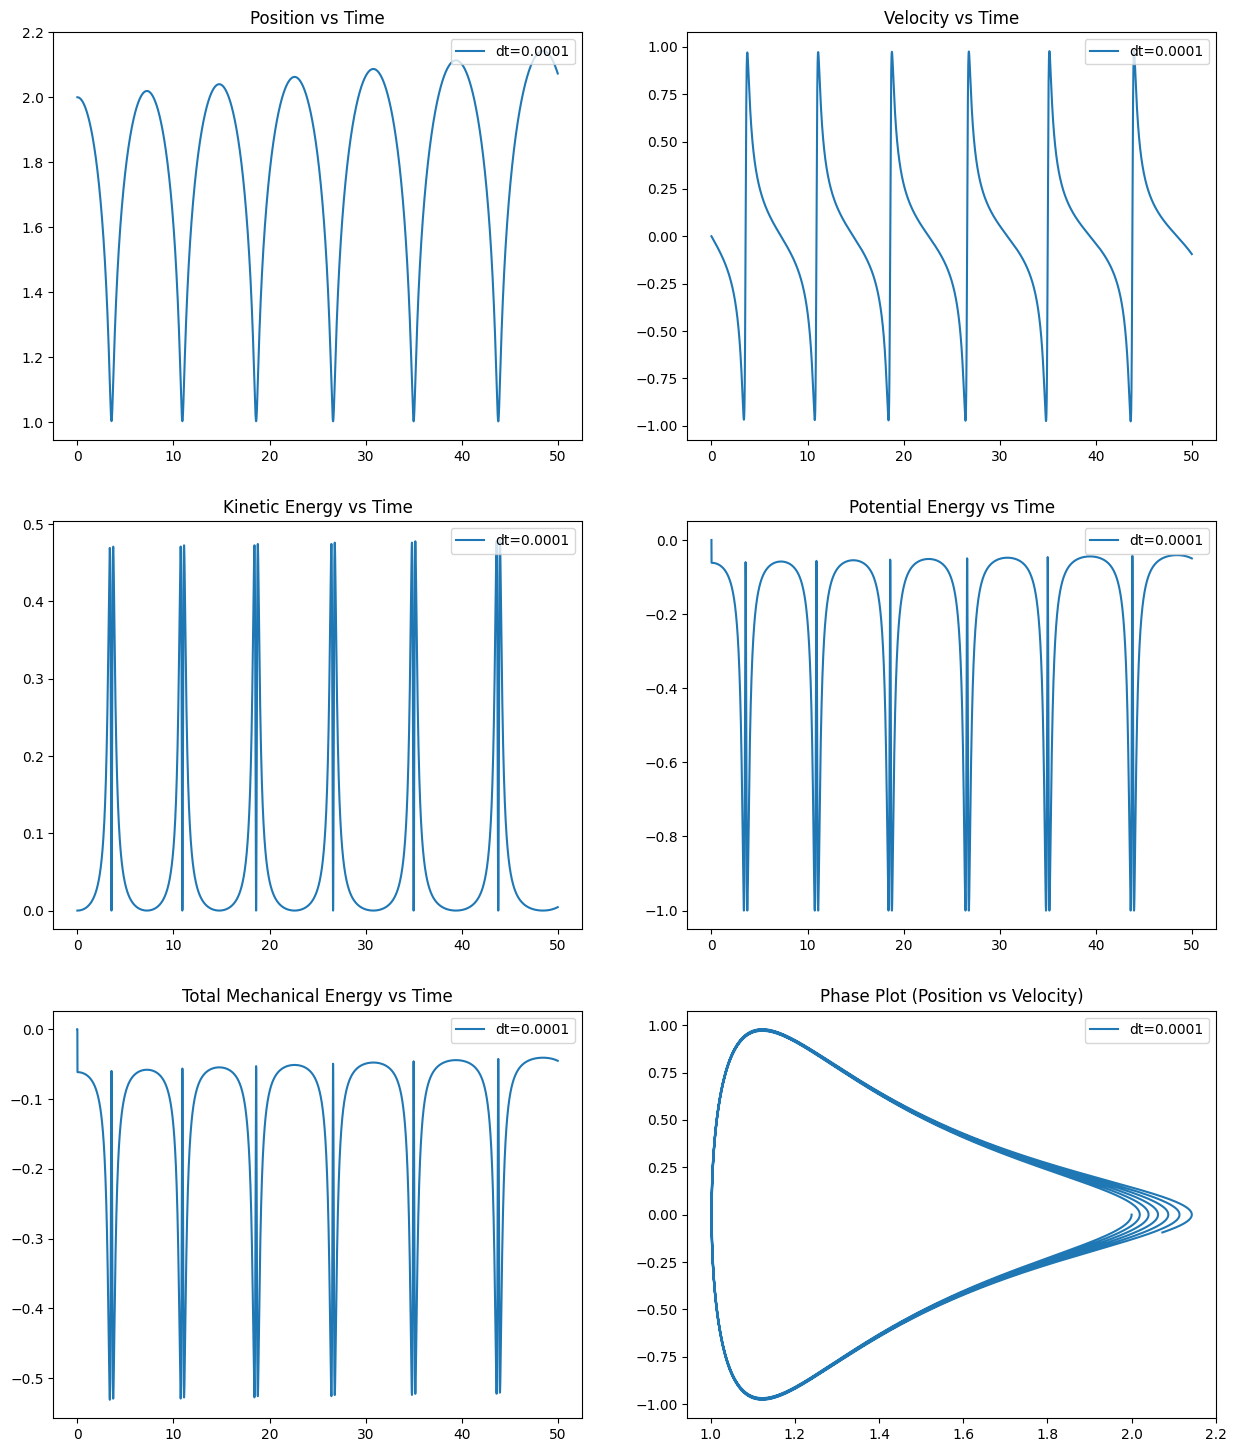

In [188]:
figure, axis = plt.subplots(3,2, figsize = (15,18))

for dt in dt_values:
    times, x, v, kinetic_energy, potential_energy, total_energy =  verlet_integration(v0,x0,dt,n)
    axis[0,0].plot(times,x, label=f"dt={dt}" )
    axis[0, 1].plot(times, v, label=f"dt={dt}")
    axis[1, 0].plot(times, kinetic_energy, label=f"dt={dt}")
    axis[1, 1].plot(times, potential_energy, label=f"dt={dt}")
    axis[2, 0].plot(times, total_energy, label=f"dt={dt}")
    axis[2, 1].plot(x, v, label=f"dt={dt}")

axis[0, 0].set_title("Position vs Time")
axis[0, 1].set_title("Velocity vs Time")
axis[1, 0].set_title("Kinetic Energy vs Time")
axis[1, 1].set_title("Potential Energy vs Time")
axis[2, 0].set_title("Total Mechanical Energy vs Time")
axis[2, 1].set_title("Phase Plot (Position vs Velocity)")

for ax in axis.flat:
    ax.legend(loc = "upper right")